## Project: Vehicle Insurance prediction

### Case Study

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else. Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

### Problem:

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

----------Let's begin----------

### Importing the libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,classification_report


### Loading the dataset

In [42]:
data = pd.read_csv('/content/train.csv')

In [43]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Features Information

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc..


id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License : 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage : 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the
past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 : Customer is interested, 0 : Customer is not interested

In [44]:
# make a copy of data
df=data.copy()
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [45]:
df.shape

(381109, 12)

In [46]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### Thus:
There are no null values in the dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [48]:
df.duplicated().sum()

0

#### Thus:
There are no duplicate values in the dataset

### Descriptive Statistics of the data

In [49]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Exploratory Data Analysis

In [50]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [51]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

#### Thus:
1. Customers not interested in taking the vehicle insurance are quite high.
2. Out of 381109 customers, 334399 are not interested and 46710 are interested.

In [52]:
df.groupby(['Gender']).sum()['Response']

Gender
Female    18185
Male      28525
Name: Response, dtype: int64

#### Thus:
    1. Males are more interested in taking vehicle insurance than females.
    2. No. of males interested in vehicle insurance : 28525
    3. No. of Females interested in vehicle insurance : 18185    
        

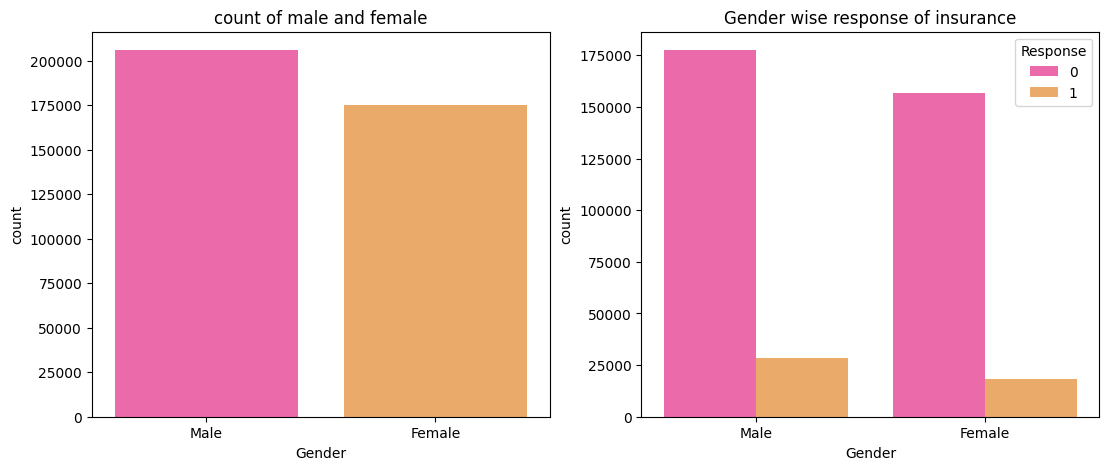

In [53]:
# gender wise vehicle insurance response
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Gender'],palette='spring')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(x=df['Gender'], hue = df['Response'],palette="spring")
plt.title("Gender wise response of insurance")
plt.savefig('Gender wise response of insurance.jpg',bbox_inches='tight',dpi=200)
plt.show()

<Axes: ylabel='count'>

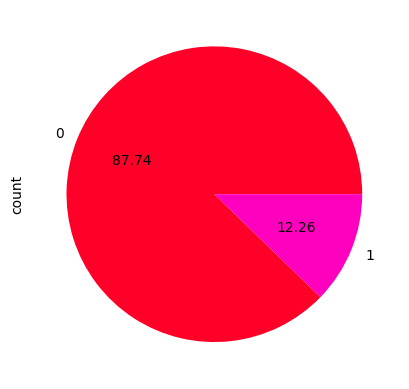

In [54]:
df['Response'].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

In [55]:
df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [56]:
df.groupby(['Vehicle_Age']).sum()['Response']

Vehicle_Age
1-2 Year     34806
< 1 Year      7202
> 2 Years     4702
Name: Response, dtype: int64

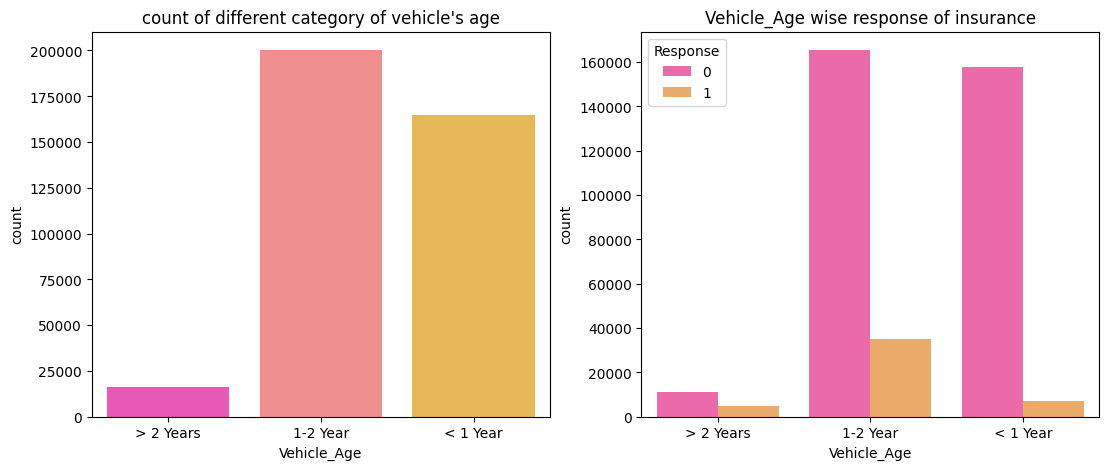

In [57]:
# Vehicle Age wise vehicle insurance response
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Vehicle_Age'],palette='spring')
plt.title("count of different category of vehicle's age")
plt.subplot(1,2,2)
sns.countplot(x=df['Vehicle_Age'], hue = df['Response'],palette="spring")
plt.title("Vehicle_Age wise response of insurance")
plt.savefig('Vehicle_Age wise response of insurance.jpg',bbox_inches='tight',dpi=200)
plt.show()

#### Thus:
    1. Customers with Vehicle age in 1-2 years category are quite high compare to >2 years.
    2. Customers with Vehicle age in 1-2 years are found to be more interested in opting for insurance.

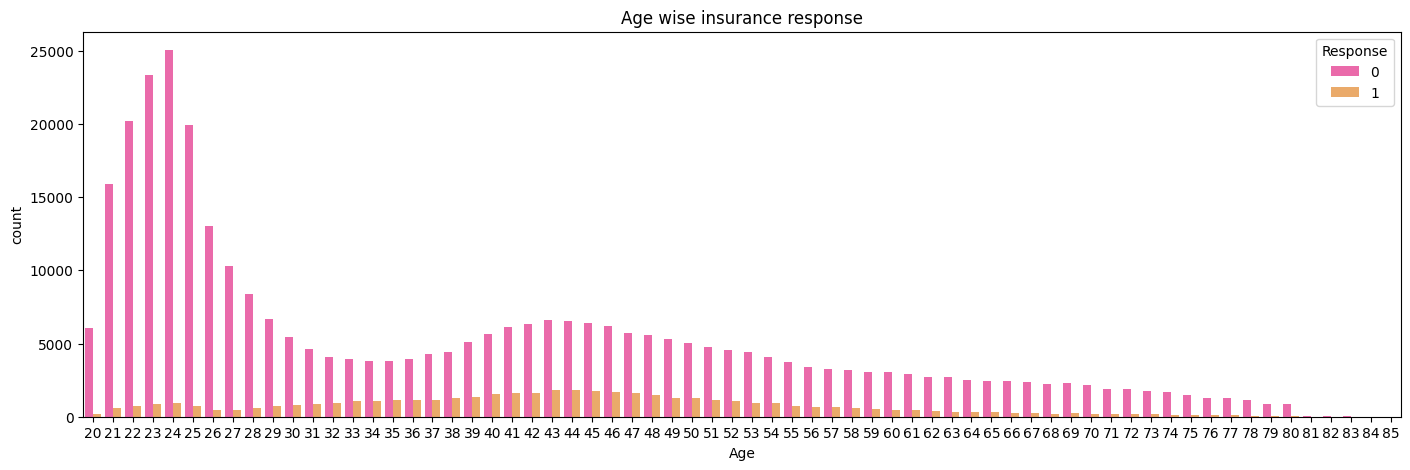

In [58]:
# Age wise Insurance Response
plt.figure(figsize=(17,5))
sns.countplot(x='Age',hue='Response',data=data, palette='spring')
plt.title('Age wise insurance response')
plt.savefig('Age wise insurance response.jpg',bbox_inches='tight',dpi=200)
plt.show()

#### Thus:
    1. Customers below 30 and above 60 years are not interested in buyong vehicle insurance.
    2. Age group between 30-60 years are most likely to buy insurance.

In [59]:
df['Driving_License'].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

In [60]:
df.groupby(['Driving_License']).sum()['Response']

Driving_License
0       41
1    46669
Name: Response, dtype: int64

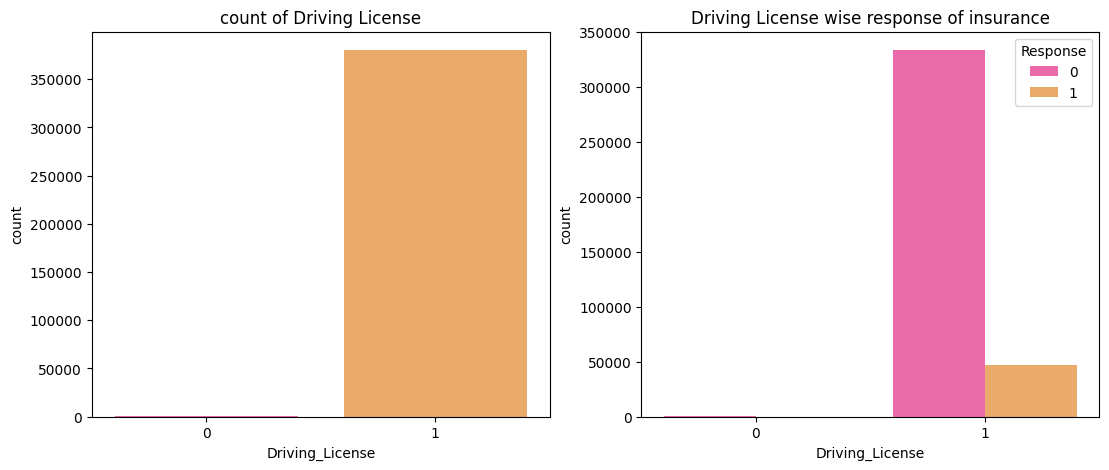

In [61]:
# Driving License wise vehicle insurance response
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Driving_License'],palette='spring')
plt.title("count of Driving License")
plt.subplot(1,2,2)
sns.countplot(x=df['Driving_License'], hue = df['Response'],palette="spring")
plt.title("Driving License wise response of insurance")
plt.savefig('Driving License wise response of insurance.jpg',bbox_inches='tight',dpi=200)
plt.show()

#### Thus:
    1. Almost all the customers have driving License except 812 customers.
    2. Customers interested in vehicle insurance are all have driving license.

In [62]:
df['Vehicle_Damage'].value_counts()

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

In [63]:
df.groupby(['Vehicle_Damage']).sum()['Response']

Vehicle_Damage
No       982
Yes    45728
Name: Response, dtype: int64

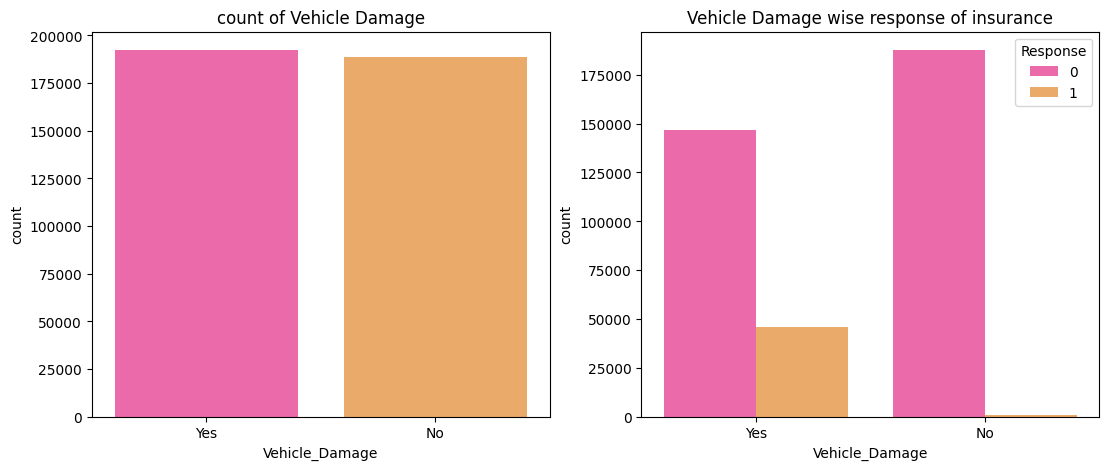

In [64]:
# Vehicle Damage wise vehicle insurance response
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Vehicle_Damage'],palette='spring')
plt.title("count of Vehicle Damage")
plt.subplot(1,2,2)
sns.countplot(x=df['Vehicle_Damage'], hue = df['Response'],palette="spring")
plt.title("Vehicle Damage wise response of insurance")
plt.savefig('Vehicle Damage wise response of insurance.jpg',bbox_inches='tight',dpi=200)
plt.show()

#### Thus:
    1. Customers with Damaged and non-damaged vehicles are almost equal in count.
    2. Customers with Damaged vehicles  are more likely to buy insurance.

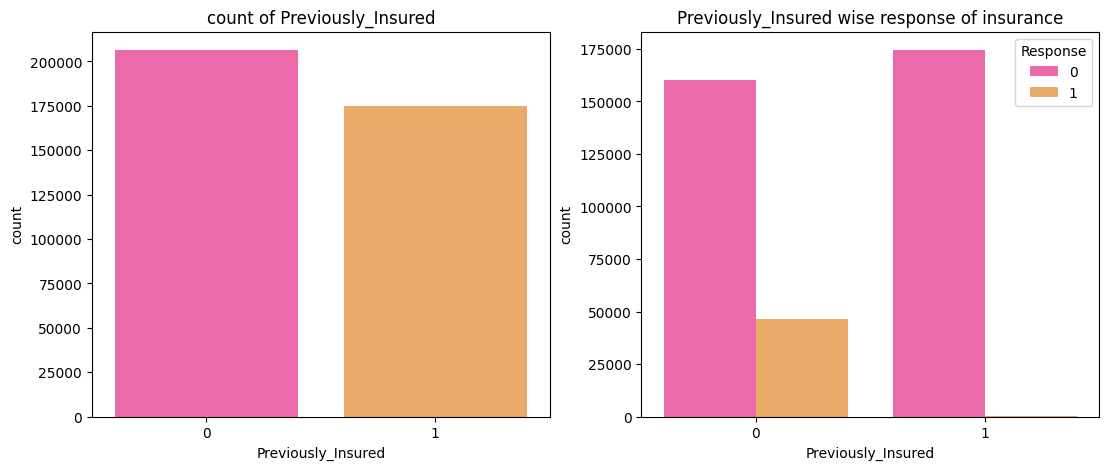

In [65]:
# Previously_Insured wise vehicle insurance response
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Previously_Insured'],palette='spring')
plt.title("count of Previously_Insured")
plt.subplot(1,2,2)
sns.countplot(x=df['Previously_Insured'], hue = df['Response'],palette="spring")
plt.title("Previously_Insured wise response of insurance")
plt.savefig('Previously_Insured wise response of insurance.jpg',bbox_inches='tight',dpi=200)
plt.show()

#### Thus:
    1. Customers who are not previously insured are likely to buy the insurance.

In [66]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [67]:
cat_col=df.select_dtypes(np.object_)
cat_col.head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


In [68]:
num_col=df.select_dtypes(np.number)
num_col.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0


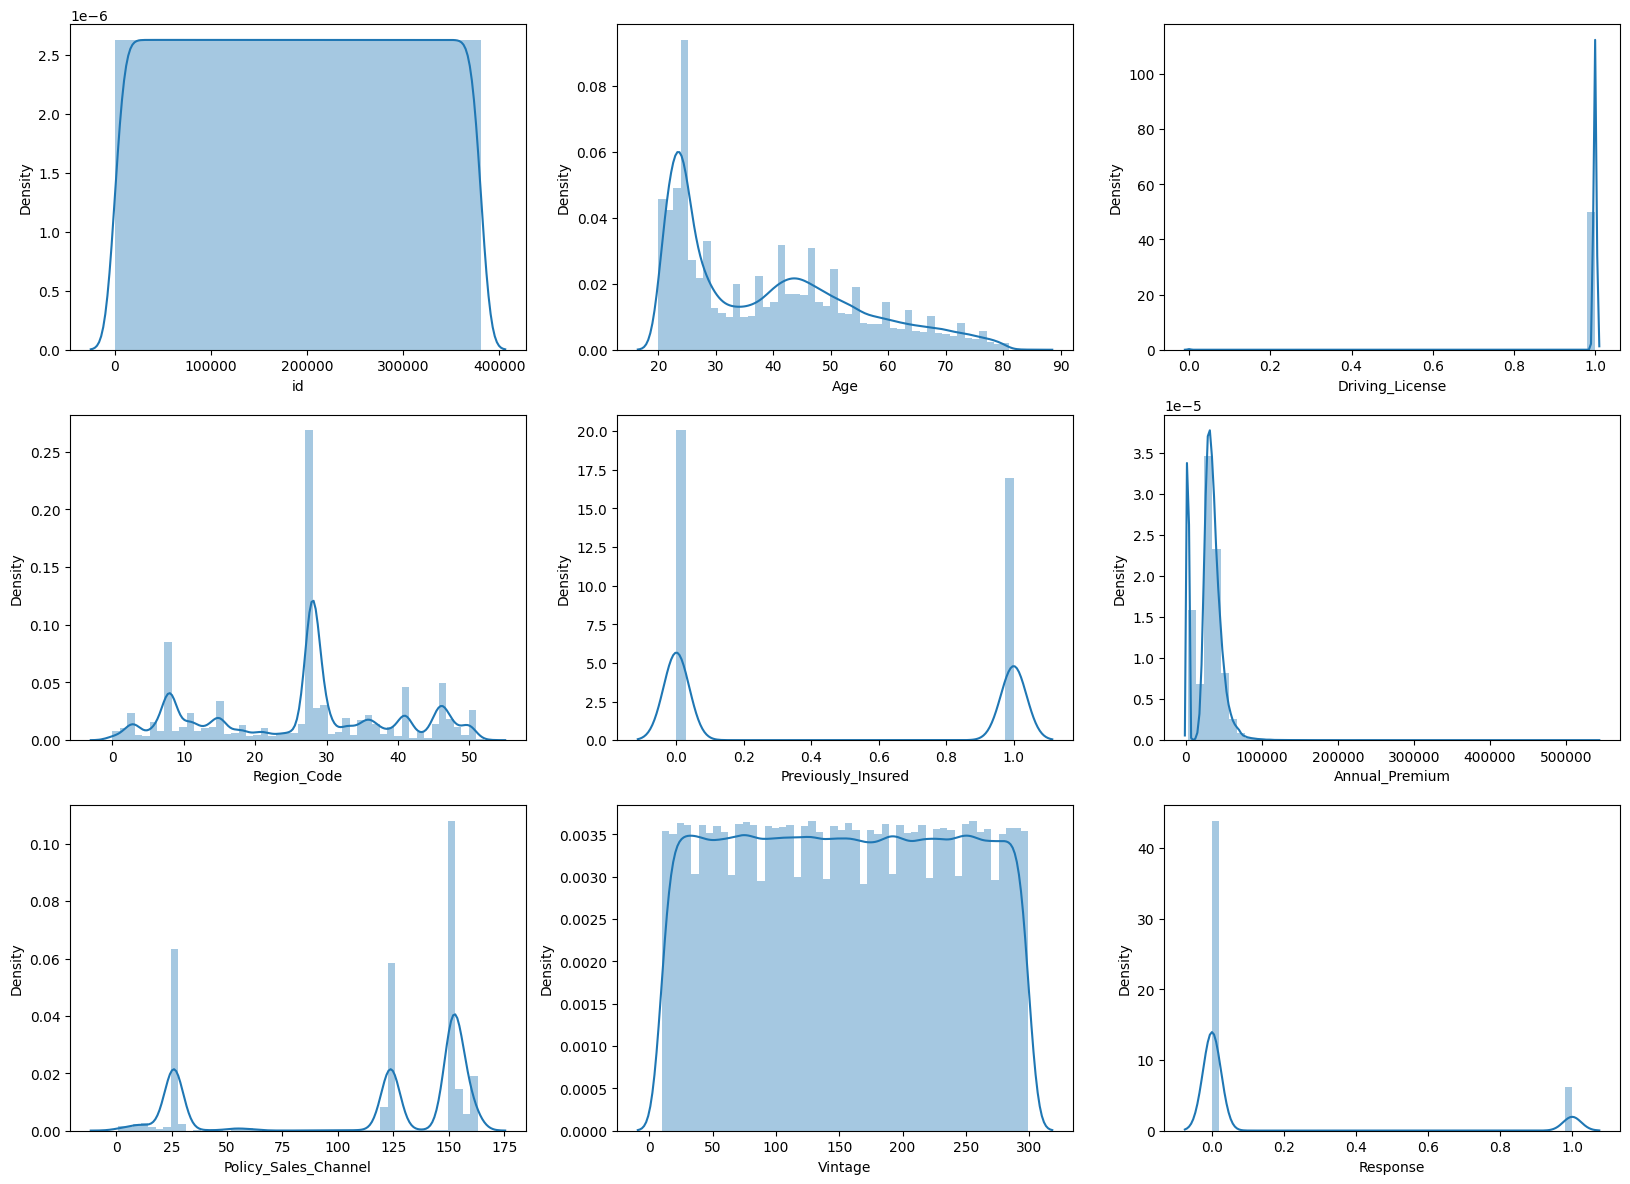

In [69]:
# A univariate distrubution of numerical features
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in num_col:
    ax=plt.subplot(12,3,plot_num)
    sns.distplot(df[col])
    plt.xlabel(col)
    plot_num+=1
#plt.title('distribution of',df_num)
plt.savefig('distribution of features.jpg')
plt.show()

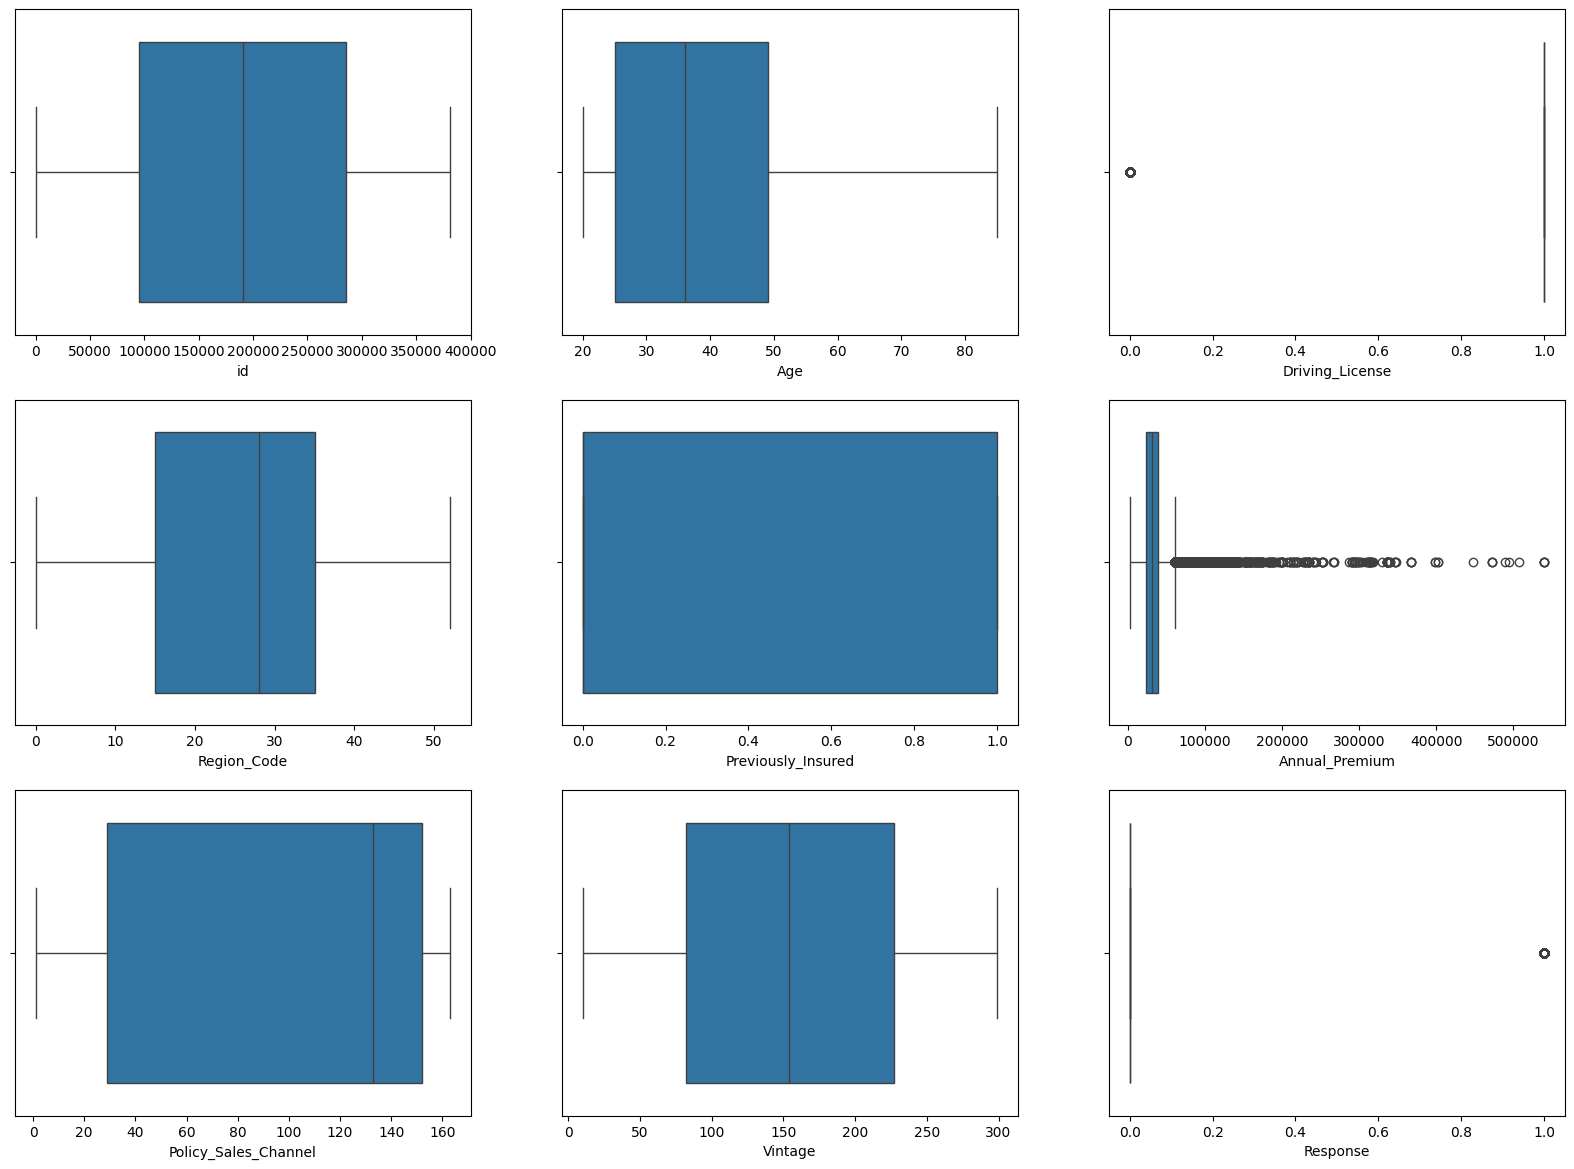

In [70]:
# A univariate boxplot of numerical features
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in num_col:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plot_num+=1
#plt.title('distribution of',df_num)

plt.savefig('boxplot of features with outliers.jpg')
plt.show()

### Data Encoding : One hot encoding

In [72]:
cat_col.columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [73]:
# let's convert bool value features like urban and US into numeric one


In [74]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [75]:
for i in cat_col:
    df[i]=lb.fit_transform(np.array(df[i]).reshape(-1,1))


In [76]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


#### Thus:
    1. All the categorical columns are converted to numerical ones via OHE.
    

### Feature Selection

In [77]:
# ID can be dropped from the dataset as it does not have anything to with the response of the customers
df1 = df.drop('id',axis=1)
x=df1.iloc[:,:10]
y=df1.iloc[:,-1:]


In [78]:
# To check the importance of features

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC_FIT = ETC.fit(x,y)
print(ETC_FIT.feature_importances_)

[0.00460527 0.15015964 0.00047182 0.10719325 0.05999296 0.015015
 0.07033043 0.24630267 0.0702271  0.27570186]


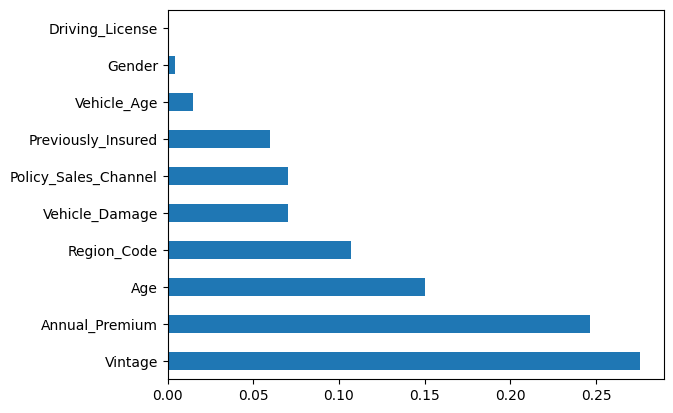

In [80]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(ETC_FIT.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

#### Thus:
    1. Diriving License and gender has not important features here.
    2. both can be dropped from the data, should not impact the result.

In [81]:
x=x.drop(['Gender','Driving_License'],axis=1)
x.head()

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,28.0,0,2,1,40454.0,26.0,217
1,76,3.0,0,0,0,33536.0,26.0,183
2,47,28.0,0,2,1,38294.0,26.0,27
3,21,11.0,1,1,0,28619.0,152.0,203
4,29,41.0,1,1,0,27496.0,152.0,39


### Handling the data

#### Thus:
    1. The data is highly imbalance.
    2. Huge difference between the datsets, resampling should be done.

In [82]:
!pip install imblearn

In [83]:
from imblearn.over_sampling import RandomOverSampler

In [84]:
# resampling the data
rs=  RandomOverSampler()
x1,y1=rs.fit_resample(x,y)

In [85]:
y1.value_counts()

Response
0           334399
1           334399
Name: count, dtype: int64

In [86]:
y.value_counts()

Response
0           334399
1            46710
Name: count, dtype: int64

Original dataset shape Counter({'Response': 1})
Resampled dataset shape Counter({'Response': 1})


<Axes: xlabel='Response', ylabel='count'>

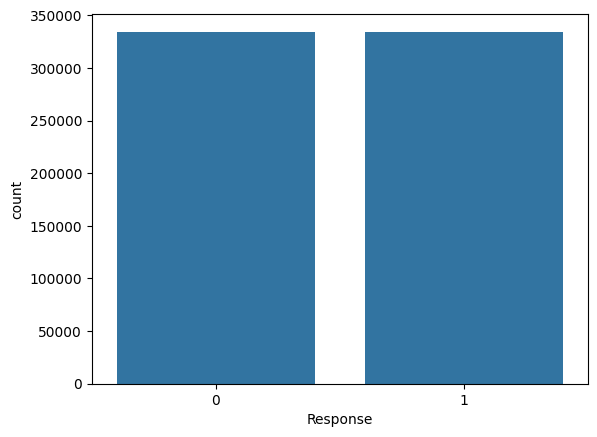

In [87]:
from collections import Counter
counter_y=Counter(y)
counter_y1=Counter(y1)
print('Original dataset shape {}'.format(counter_y))
print('Resampled dataset shape {}'.format(counter_y1))
sns.countplot(data=y1,x='Response')

In [88]:
x1.shape, y1.shape

((668798, 8), (668798, 1))

### Sampling the data

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2, random_state=1)

In [90]:
x_train.shape,x_test.shape

((535038, 8), (133760, 8))

In [91]:
y_train.shape,y_test.shape

((535038, 1), (133760, 1))

### Standardization of data

In [92]:
# Standardization of data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [93]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Model Building

#### Steps:
    1. Problem can be identified as binary classification
    2. Models used to best fit the data
    (a) KNN Classifier
    (b) Logistic Regression
    (c) Random Forest

### (a) KNN Classifier

In [103]:
# logistic regression model
def KNN_model(x_train,y_train,x_test):
    KNN_model = KNeighborsClassifier(n_neighbors=3)
    KNN_model_fit = KNN_model.fit(x_train,y_train)
    pred = KNN_model_fit.predict(x_test)
    return pred

In [104]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model_fit = KNN_model.fit(x_train,y_train)
pred_KNN = KNN_model_fit.predict(x_test)

In [106]:
pred_KNN

array([1, 1, 1, ..., 1, 1, 1])

In [112]:

def model_log_diag(y_test,pred):
    acc = accuracy_score(y_test,pred)
    prc = precision_score(y_test,pred)
    clf = classification_report(y_test,pred)
    conf = confusion_matrix(y_test,pred)
    return acc, prc,clf,conf

In [113]:
acc_knn, prc_knn,clf_knn,conf_knn=model_log_diag(y_test,pred_KNN)

In [114]:
print('Model: KNN Classification')

print('The accuracy of the model is:',round(acc_knn,2))
print('The precision of the model is:',round(prc_knn,2))
print('The confusion matrix is :',conf_knn)
print('The classification report is :\n',clf_knn)

Model: KNN Classification
The accuracy of the model is: 0.9
The precision of the model is: 0.84
The confusion matrix is : [[53992 12855]
 [  492 66421]]
The classification report is :
               precision    recall  f1-score   support

           0       0.99      0.81      0.89     66847
           1       0.84      0.99      0.91     66913

    accuracy                           0.90    133760
   macro avg       0.91      0.90      0.90    133760
weighted avg       0.91      0.90      0.90    133760



<Axes: >

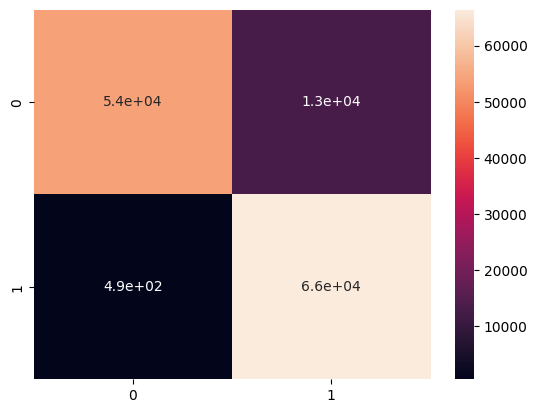

In [115]:
sns.heatmap(confusion_matrix(y_test,pred_KNN), annot=True)

### (b) Logistic Regression

In [116]:
# logistic regression model
def log_model(x_train,y_train,x_test):
    lg_model = LogisticRegression()
    lg_model_fit = lg_model.fit(x_train,y_train)
    pred = lg_model_fit.predict(x_test)
    return pred

In [117]:
pred_LG=log_model(x_train,y_train,x_test)

In [118]:
pred_LG

array([0, 1, 1, ..., 1, 1, 1])

In [119]:
acc_lg, prc_lg,clf_lg,conf_lg=model_log_diag(y_test,pred_LG)

In [120]:
print('Model: Logistic Regression')

print('The accuracy of the model is:',round(acc_lg,2))
print('The precision of the model is:',round(prc_lg,2))
print('The confusion matrix is :',conf_lg)
print('The classification report is :\n',clf_lg)

Model: Logistic Regression
The accuracy of the model is: 0.78
The precision of the model is: 0.71
The confusion matrix is : [[39510 27337]
 [ 1577 65336]]
The classification report is :
               precision    recall  f1-score   support

           0       0.96      0.59      0.73     66847
           1       0.71      0.98      0.82     66913

    accuracy                           0.78    133760
   macro avg       0.83      0.78      0.78    133760
weighted avg       0.83      0.78      0.78    133760



<Axes: >

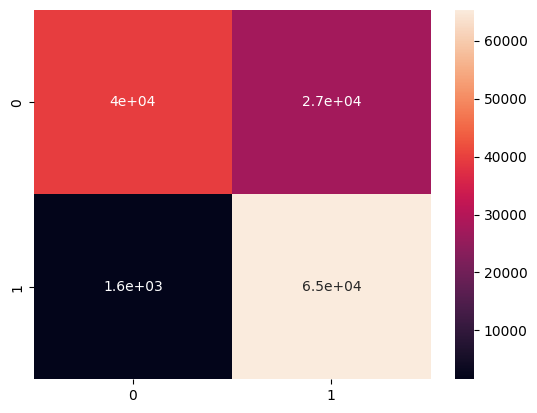

In [121]:
sns.heatmap(confusion_matrix(y_test,pred_LG), annot=True)

### (c) Random Forest Classifier

In [122]:
## make function of random forest

def rndf_tree(x_train,x_test,y_train):
    model_rf=RandomForestClassifier(criterion='entropy', max_depth=5)
    train_model=model_rf.fit(x_train,y_train)
    pred1=train_model.predict(x_test)
    return pred1

In [123]:
pred_rdf=rndf_tree(x_train,x_test,y_train)

In [124]:
pred_rdf

array([0, 1, 1, ..., 1, 1, 1])

In [125]:
acc_rdf, prc_rdf,clf_rdf,conf_rdf=model_log_diag(y_test,pred_rdf)

In [126]:
print('Model: Random Forest Classifier')

print('The accuracy of the model is:',round(acc_rdf,2))
print('The precision of the model is:',round(prc_rdf,2))
print('The confusion matrix is :',conf_rdf)
print('The classification report is :\n',clf_rdf)

Model: Random Forest Classifier
The accuracy of the model is: 0.79
The precision of the model is: 0.73
The confusion matrix is : [[44681 22166]
 [ 5587 61326]]
The classification report is :
               precision    recall  f1-score   support

           0       0.89      0.67      0.76     66847
           1       0.73      0.92      0.82     66913

    accuracy                           0.79    133760
   macro avg       0.81      0.79      0.79    133760
weighted avg       0.81      0.79      0.79    133760



<Axes: >

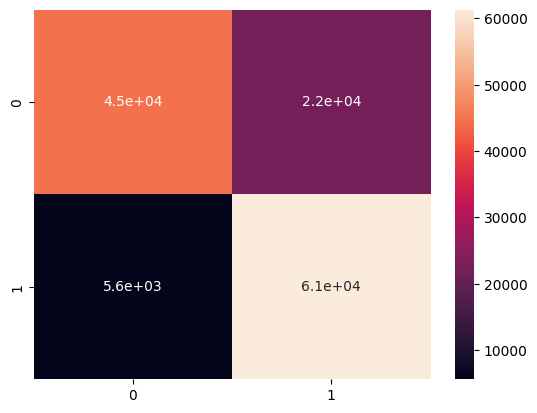

In [127]:
sns.heatmap(confusion_matrix(y_test,pred_rdf), annot=True)

### Comparing the models

In [128]:
# composing a table of models
ind=['KNN Classifier','Logistic regression','Random forest']
para={"Accuracy":[acc_knn,acc_lg,acc_rdf],"Precision":[prc_knn,prc_lg, prc_rdf]}
table=pd.DataFrame(data=para,index=ind)
table

,Accuracy,Precision
KNN Classifier,0.900217,0.837845
Logistic regression,0.783837,0.705017
Random forest,0.792516,0.734513


### Conculsion:


### File submission

In [129]:
# importing the test data
data_test = pd.read_csv('/content/test.csv')

In [130]:
data_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [131]:
test= data_test.iloc[:,1:]


In [132]:
cat_test_col= test.select_dtypes(np.object_)
cat_test_col.columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [133]:
for i in cat_test_col:
    test[i]=lb.fit_transform(np.array(test[i]).reshape(-1,1))

In [134]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,1,27,1,28.0,1,1,0,59097.0,152.0,297


In [135]:
test.drop(['Gender','Driving_License'],axis=1,inplace=True)

In [136]:
# scaling the data

In [137]:
test_sc = sc.fit_transform(test)

In [138]:
result = KNN_model.predict(test_sc)

In [139]:
result

array([0, 0, 0, ..., 0, 0, 0])

In [140]:
Data_submit = pd.DataFrame({'id': data_test['id'], 'Response':result})

In [141]:
Data_submit

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,1
127034,508144,0
127035,508145,0


In [142]:
Data_submit.to_csv('Submission.csv', index=False)

In [143]:
Data_submit['Response'].value_counts()

Response
0    97374
1    29663
Name: count, dtype: int64

1. Test data has been PREDICTED using KNN classifier model.
2. The predicted values with the IDs of the customer in saved in filename = 'Submission' in excel format.


# THE END!!